In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Задаём общие параметры
N = 7777  # Общее количество особей в популяции
a = 0.007  # Коэффициент заболевания
b = 0.003  # Коэффициент выздоровления
crit_I = 90  # Критическое значение зараженных
t_end = 10000  # Конечное время
dt = 1  # Шаг времени


In [2]:
def simulate_epidemic(N, I0, a, b, crit_I, t_end, dt):
    t = 0
    I = I0
    R = 0
    S = N - I - R

    time = []
    count_S = []
    count_I = []
    count_R = []

    while t < t_end and int(I) != 0:
        if I > crit_I:
            # Случай I > I*
            dS = -a * S * dt
            dI = (a * S - b * I) * dt
            dR = b * I * dt
            S += dS
            I += dI
            R += dR
        else:
            # Случай I <= I*
            dI = -b * I * dt
            dR = b * I * dt
            I += dI
            R += dR
            S = N - I - R  # Обеспечиваем S + I + R = N

        time.append(t)
        count_S.append(S)
        count_I.append(I)
        count_R.append(R)
        t += dt

    return time, count_S, count_I, count_R


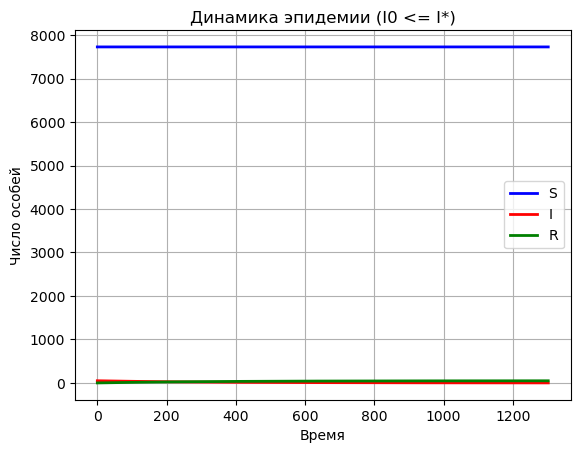

In [3]:
# Случай 1: I0 <= I*
I0_case1 = 50  # Начальное число инфицированных (I0 <= I*)
time1, S1, I1, R1 = simulate_epidemic(N, I0_case1, a, b, crit_I, t_end, dt)

# Построение графика
plt.figure(dpi=100)
plt.plot(time1, S1, lw=2, label='S', color='blue')
plt.plot(time1, I1, lw=2, label='I', color='red')
plt.plot(time1, R1, lw=2, label='R', color='green')
plt.title('Динамика эпидемии (I0 <= I*)')
plt.xlabel('Время')
plt.ylabel('Число особей')
plt.legend()
plt.grid()
plt.show()


In [4]:
# Реализация метода Рунге-Кутты 4-го порядка
def simulate_epidemic_rk4(N, I0, a, b, crit_I, t_end, dt):
    t = 0
    I = I0
    R = 0
    S = N - I - R

    time = []
    count_S = []
    count_I = []
    count_R = []

    while t < t_end and int(I) != 0:
        if I > crit_I:
            def dSdt(S, I):
                return -a * S * I

            def dIdt(S, I):
                return a * S * I - b * I

            def dRdt(I):
                return b * I

            # Расчёт коэффициентов Рунге-Кутты
            kS1 = dSdt(S, I) * dt
            kI1 = dIdt(S, I) * dt
            kR1 = dRdt(I) * dt

            kS2 = dSdt(S + 0.5 * kS1, I + 0.5 * kI1) * dt
            kI2 = dIdt(S + 0.5 * kS1, I + 0.5 * kI1) * dt
            kR2 = dRdt(I + 0.5 * kI1) * dt

            kS3 = dSdt(S + 0.5 * kS2, I + 0.5 * kI2) * dt
            kI3 = dIdt(S + 0.5 * kS2, I + 0.5 * kI2) * dt
            kR3 = dRdt(I + 0.5 * kI2) * dt

            kS4 = dSdt(S + kS3, I + kI3) * dt
            kI4 = dIdt(S + kS3, I + kI3) * dt
            kR4 = dRdt(I + kI3) * dt

            # Обновление значений
            S += (kS1 + 2 * kS2 + 2 * kS3 + kS4) / 6
            I += (kI1 + 2 * kI2 + 2 * kI3 + kI4) / 6
            R += (kR1 + 2 * kR2 + 2 * kR3 + kR4) / 6
        else:
            def dIdt(I):
                return -b * I

            def dRdt(I):
                return b * I

            # Расчёт коэффициентов Рунге-Кутты
            kI1 = dIdt(I) * dt
            kR1 = dRdt(I) * dt

            kI2 = dIdt(I + 0.5 * kI1) * dt
            kR2 = dRdt(I + 0.5 * kI1) * dt

            kI3 = dIdt(I + 0.5 * kI2) * dt
            kR3 = dRdt(I + 0.5 * kI2) * dt

            kI4 = dIdt(I + kI3) * dt
            kR4 = dRdt(I + kI3) * dt

            # Обновление значений
            I += (kI1 + 2 * kI2 + 2 * kI3 + kI4) / 6
            R += (kR1 + 2 * kR2 + 2 * kR3 + kR4) / 6
            S = N - I - R  # Обеспечиваем S + I + R = N

        time.append(t)
        count_S.append(S)
        count_I.append(I)
        count_R.append(R)
        t += dt

    return time, count_S, count_I, count_R

# Симуляция с помощью метода Рунге-Кутты
time_rk4, S_rk4, I_rk4, R_rk4 = simulate_epidemic_rk4(N, I0_case2, a, b, crit_I, t_end, dt)

# Построение графика
plt.figure(dpi=100)
plt.plot(time_rk4, S_rk4, lw=2, label='S', color='blue')
plt.plot(time_rk4, I_rk4, lw=2, label='I', color='red')
plt.plot(time_rk4, R_rk4, lw=2, label='R', color='green')
plt.title('Динамика эпидемии (Метод Рунге-Кутты)')
plt.xlabel('Время')
plt.ylabel('Число особей')
plt.legend()
plt.grid()
plt.show()


NameError: name 'I0_case2' is not defined

In [ ]:
class BST:

    def __init__(self,value,level):
        self.value = value
        self.level = level

    def insert(self, value):
        if self.__value == None:
            self.__value = value
            self.__left = BST()
            self.__right = BST()
        elif self.__value < value:
            self.__right.insert(value)
        else:
            self.__left.insert(value)
 
    def find(self, value, level=0):
        if self.__value == None:
            return -1
        if self.__value == value:
            return level
        if self.__value < value:
            return self.__right.find(value, level + 1)
        return self.__left.find(value, level + 1)

0


In [17]:
class Graph:

    def __init__(self, n, matrix):
         self.__n = n
         self.__matrix = matrix

    def __dfs(self, i, used=set()):
            used = used | {i}
            for j in range(self.__n):
                if self.__matrix[i][j] == 1 and j not in used:
                    used = used | self.__dfs(j, used) 
            return used
    
    def is_connected(self):
         visited = self.__dfs(0)
         return len(visited) == self.__n

In [18]:
n = int(input())
matrix = [list(map(int, input().split())) for _ in range(n)]

graph = Graph(n, matrix)
print("да" if graph.is_connected() else "нет")

да


In [24]:
from mimesis import Text
text = Text('ru')
print(text.text(quantity=5))

ModuleNotFoundError: No module named 'mimesis'